In [6]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import string

from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline


In [7]:
df = pd.read_csv('/content/drive/MyDrive/trainset.csv')
df.head()

label                                            Column1  \
0  __label__2                     Stuning even for the non-gamer   
1  __label__2              The best soundtrack ever to anything.   
2  __label__2                                           Amazing!   
3  __label__2                               Excellent Soundtrack   
4  __label__2   Remember, Pull Your Jaw Off The Floor After H...   

                                             Column2  
0   This sound track was beautiful! It paints the...  
1   I'm reading a lot of reviews saying that this...  
2   This soundtrack is my favorite music of all t...  
3   I truly like this soundtrack and I enjoy vide...  
4   If you've played the game, you know how divin...

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.describe()

label        Column1  Column2
count      1048575        1048575  1048114
unique           2         807613  1043341
top     __label__2   Disappointed        (
freq        530160           2709      487

In [10]:
df.fillna(value='', inplace=True)

In [11]:
df.isna().sum()

label      0
Column1    0
Column2    0
dtype: int64

## Label encoding

In [12]:
df['label'] = df['label'].astype('category')

# Assigning numerical values and storing it in another columns
df['lab'] = df['label'].cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(
    df[['lab']]).toarray())

New_df = df.join(enc_df)

print(New_df)



              label                                            Column1  \
0        __label__2                     Stuning even for the non-gamer   
1        __label__2              The best soundtrack ever to anything.   
2        __label__2                                           Amazing!   
3        __label__2                               Excellent Soundtrack   
4        __label__2   Remember, Pull Your Jaw Off The Floor After H...   
...             ...                                                ...   
1048570  __label__2                                          Good book   
1048571  __label__1                                   Cheap and flimsy   
1048572  __label__1                               Total waste of money   
1048573  __label__2                        Whitmor budget garment rack   
1048574  __label__2                                 Serves its purpose   

                                                   Column2  lab    0    1  
0         This sound track was beau

In [13]:
df.head(20)

label                                            Column1  \
0   __label__2                     Stuning even for the non-gamer   
1   __label__2              The best soundtrack ever to anything.   
2   __label__2                                           Amazing!   
3   __label__2                               Excellent Soundtrack   
4   __label__2   Remember, Pull Your Jaw Off The Floor After H...   
5   __label__2                            an absolute masterpiece   
6   __label__1                                       Buyer beware   
7   __label__2                                     Glorious story   
8   __label__2                                   A FIVE STAR BOOK   
9   __label__2                      Whispers of the Wicked Saints   
10  __label__1                                         The Worst!   
11  __label__2                                         Great book   
12  __label__2                                         Great Read   
13  __label__1                                          Oh please   
14  __label__1                               Awful beyond belief!   
15  __label__1            Don't try to fool us with fake reviews.   
16  __label__2                     A romantic zen baseball comedy   
17  __label__2                 Fashionable Compression Stockings!   
18  __label__2                        Jobst UltraSheer Thigh High   
19  __label__1    sizes recomended in the size chart are not real   

                                              Column2  lab  
0    This sound track was beautiful! It paints the...    1  
1    I'm reading a lot of reviews saying that this...    1  
2    This soundtrack is my favorite music of all t...    1  
3    I truly like this soundtrack and I enjoy vide...    1  
4    If you've played the game, you know how divin...    1  
5    I am quite sure any of you actually taking th...    1  
6    This is a self-published book, and if you wan...    0  
7    I loved Whisper of the wicked saints. The sto...    1  
8    I just finished reading Whisper of the Wicked...    1  
9    This was a easy to read book that made me wan...    1  
10   A complete waste of time. Typographical error...    0  
11   This was a great book,I just could not put it...    1  
12   I thought this book was brilliant, but yet re...    1  
13   I guess you have to be a romance novel lover ...    0  
14   I feel I have to write to keep others from wa...    0  
15   It's glaringly obvious that all of the glowin...    0  
16   When you hear folks say that they don't make ...    1  
17   After I had a DVT my doctor required me to we...    1  
18   Excellent product. However, they are very dif...    1  
19   sizes are much smaller than what is recomende...    0

## Taking required column

In [14]:
df = df[['Column2','lab']]
df.head(20)

Column2  lab
0    This sound track was beautiful! It paints the...    1
1    I'm reading a lot of reviews saying that this...    1
2    This soundtrack is my favorite music of all t...    1
3    I truly like this soundtrack and I enjoy vide...    1
4    If you've played the game, you know how divin...    1
5    I am quite sure any of you actually taking th...    1
6    This is a self-published book, and if you wan...    0
7    I loved Whisper of the wicked saints. The sto...    1
8    I just finished reading Whisper of the Wicked...    1
9    This was a easy to read book that made me wan...    1
10   A complete waste of time. Typographical error...    0
11   This was a great book,I just could not put it...    1
12   I thought this book was brilliant, but yet re...    1
13   I guess you have to be a romance novel lover ...    0
14   I feel I have to write to keep others from wa...    0
15   It's glaringly obvious that all of the glowin...    0
16   When you hear folks say that they don't make ...    1
17   After I had a DVT my doctor required me to we...    1
18   Excellent product. However, they are very dif...    1
19   sizes are much smaller than what is recomende...    0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Column2  1048575 non-null  object
 1   lab      1048575 non-null  int8  
dtypes: int8(1), object(1)
memory usage: 9.0+ MB


In [16]:
df['Column2']=df['Column2'].str.lower()
df.head()

Column2  lab
0   this sound track was beautiful! it paints the...    1
1   i'm reading a lot of reviews saying that this...    1
2   this soundtrack is my favorite music of all t...    1
3   i truly like this soundtrack and i enjoy vide...    1
4   if you've played the game, you know how divin...    1

## Removing stopwords

In [17]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords

In [19]:
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [20]:
stop_words = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

def remove_stop(x):
  return ",".join([word for word in str(x).split() if word not in stop_words])
df['Column2'].apply(lambda x : remove_stop(x))

0          sound,track,beautiful!,paints,senery,mind,well...
1          i'm,reading,lot,reviews,saying,best,'game,soun...
2          soundtrack,favorite,music,time,,hands,down.,in...
3          truly,like,soundtrack,enjoy,video,game,music.,...
4          played,game,,know,divine,music,is!,every,singl...
                                 ...                        
1048570    like,strange,assortment,reading,material,main,...
1048571               bought,event,left,venue,,miss,one,bit.
1048572    total,waste,money.,bought,one,time,use,garage,...
1048573    purchased,whitmor,garment,rack,use,yardsales.,...
1048574    bought,put,laundry,room,hang,clothes,can't,go,...
Name: Column2, Length: 1048575, dtype: object

## Cleaning the text

In [21]:

def strip_html(Column2):
    soup = BeautifulSoup(Column2, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(Column2):
    return re.sub('\[[^]]*\]', '', Column2)
# Removing URL's++
def remove_between_square_brackets(Column2):
    return re.sub(r'http\S+', '', Column2)


## Word cloud for label 1 (sarcastic)

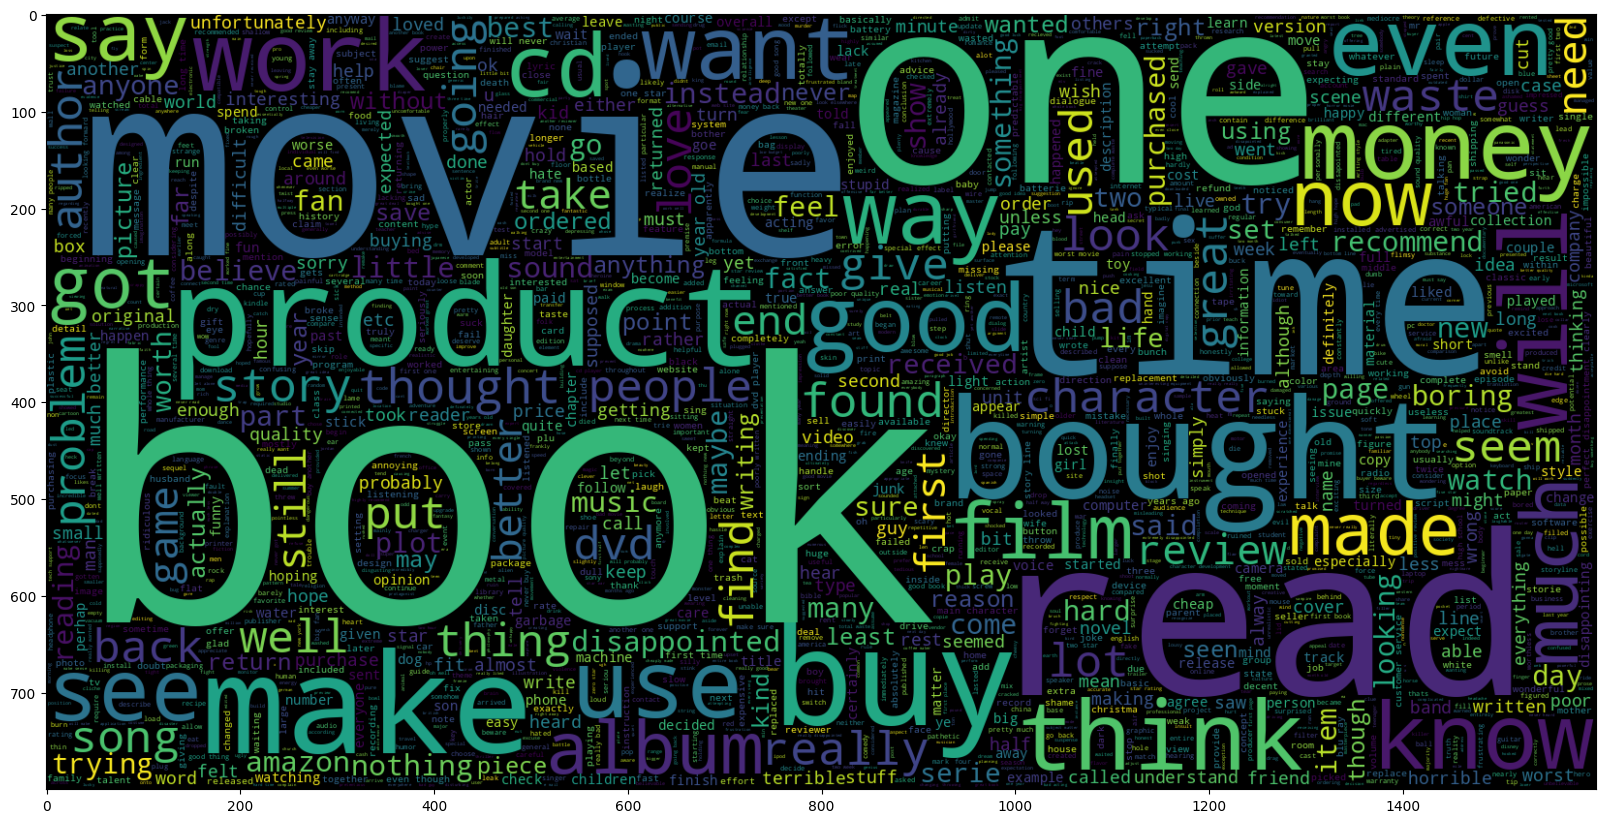

In [22]:
plt.figure(figsize = (20,20)) # Text that is  Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.lab == 0].Column2))
plt.imshow(wc , interpolation = 'bilinear')

## word cloud for label 2(non sarcastic)

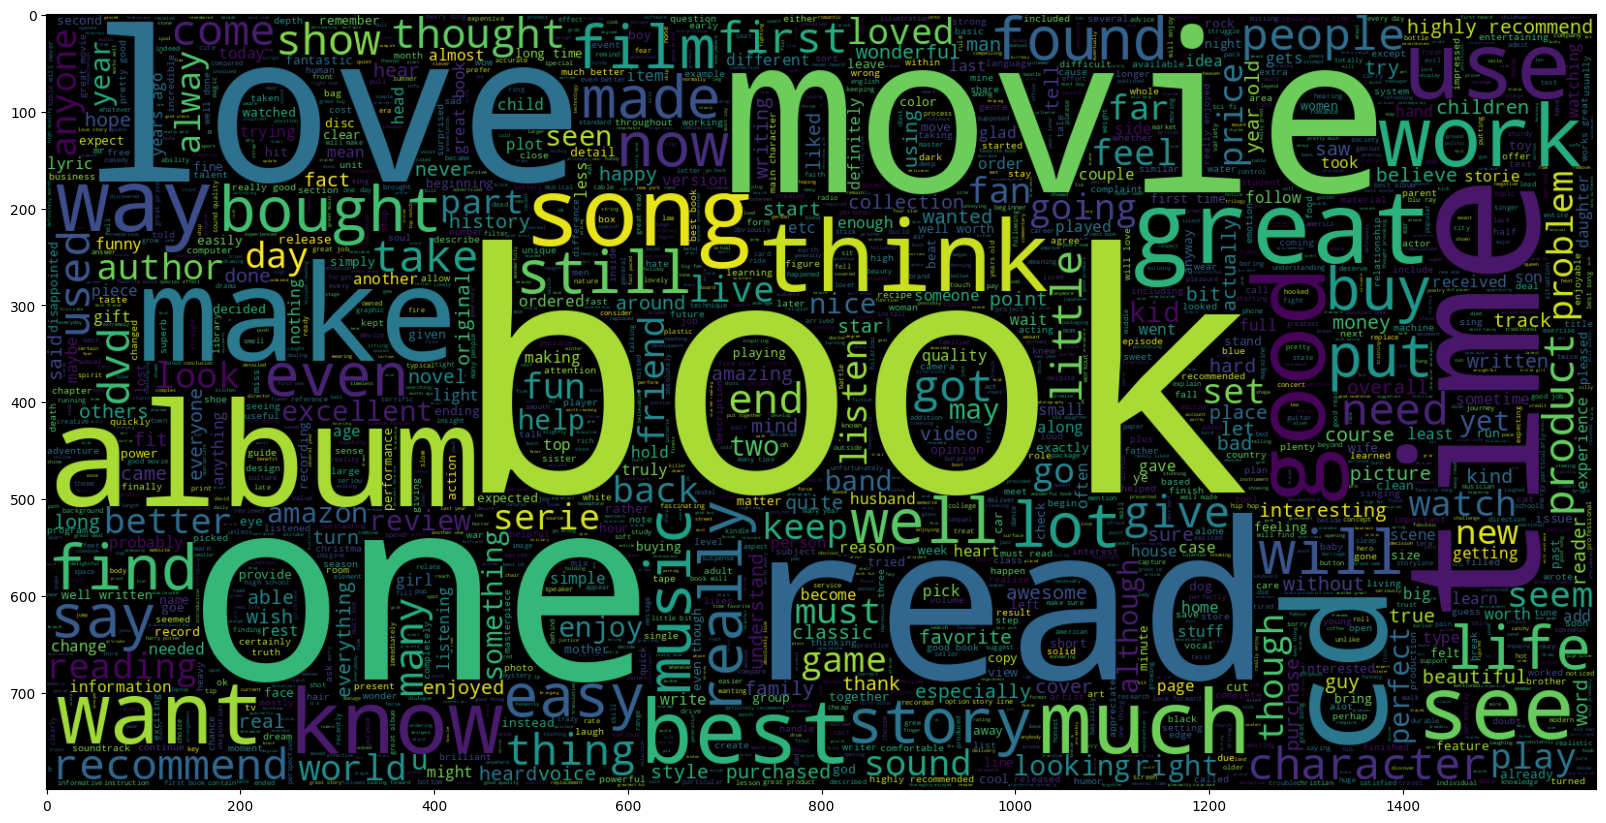

In [23]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.lab == 1].Column2))
plt.imshow(wc , interpolation = 'bilinear')

## Number of characters in texts

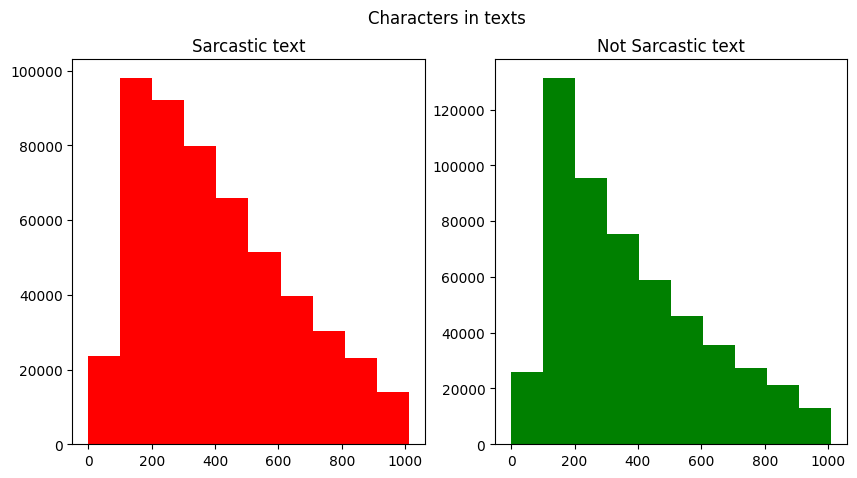

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['lab']==0]['Column2'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Sarcastic text')
text_len=df[df['lab']==1]['Column2'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show()


## Spliting Words

In [26]:
words = []
for i in df.Column2.values:
    words.append(i.split())
words[:5]

[['this',
  'sound',
  'track',
  'was',
  'beautiful!',
  'it',
  'paints',
  'the',
  'senery',
  'in',
  'your',
  'mind',
  'so',
  'well',
  'i',
  'would',
  'recomend',
  'it',
  'even',
  'to',
  'people',
  'who',
  'hate',
  'vid.',
  'game',
  'music!',
  'i',
  'have',
  'played',
  'the',
  'game',
  'chrono',
  'cross',
  'but',
  'out',
  'of',
  'all',
  'of',
  'the',
  'games',
  'i',
  'have',
  'ever',
  'played',
  'it',
  'has',
  'the',
  'best',
  'music!',
  'it',
  'backs',
  'away',
  'from',
  'crude',
  'keyboarding',
  'and',
  'takes',
  'a',
  'fresher',
  'step',
  'with',
  'grate',
  'guitars',
  'and',
  'soulful',
  'orchestras.',
  'it',
  'would',
  'impress',
  'anyone',
  'who',
  'cares',
  'to',
  'listen!',
  '^_^'],
 ["i'm",
  'reading',
  'a',
  'lot',
  'of',
  'reviews',
  'saying',
  'that',
  'this',
  'is',
  'the',
  'best',
  "'game",
  "soundtrack'",
  'and',
  'i',
  'figured',
  'that',
  "i'd",
  'write',
  'a',
  'review',
  'to

## spliting the data set

In [27]:
x_train,x_test,y_train,y_test = train_test_split(df.Column2,df.lab, test_size = 0.3 , random_state = 0)

## Tokenizing->numbers

In [28]:
max_features = 35000
maxlen = 200

In [29]:
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' ')

In [30]:
tokenizer = Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_ind = tokenizer.texts_to_sequences(words)
tokenized_ind

[[7,
  190,
  488,
  13,
  13013,
  9,
  6247,
  1,
  10,
  62,
  528,
  26,
  98,
  3,
  35,
  1530,
  9,
  68,
  5,
  125,
  64,
  631,
  213,
  5860,
  3,
  19,
  479,
  1,
  213,
  27179,
  2349,
  16,
  45,
  6,
  30,
  6,
  1,
  910,
  3,
  19,
  134,
  479,
  9,
  39,
  1,
  104,
  5860,
  9,
  9559,
  308,
  34,
  6406,
  2,
  369,
  4,
  27006,
  1128,
  15,
  12355,
  3718,
  2,
  5135,
  9,
  35,
  5643,
  193,
  64,
  3659,
  5,
  26813,
  31988],
 [103,
  140,
  4,
  169,
  6,
  264,
  751,
  12,
  7,
  8,
  1,
  104,
  2,
  3,
  1382,
  12,
  344,
  455,
  4,
  350,
  5,
  3866,
  4,
  3249,
  7,
  10,
  20,
  8,
  2415,
  3525,
  1,
  138,
  8,
  3446,
  2,
  103,
  79,
  473,
  5,
  9,
  11,
  155,
  132,
  2,
  109,
  1710,
  360,
  6263,
  5,
  288,
  5239,
  18,
  7,
  8,
  215,
  27007,
  3,
  178,
  1013,
  16,
  28,
  14,
  22,
  166,
  5,
  91,
  85,
  111,
  11,
  7,
  76,
  1317,
  7,
  8,
  1,
  53,
  25,
  12,
  3,
  197,
  35,
  24,
  164,
  136,
  6898],
 [

In [31]:
sentlen=20
emdoc=pad_sequences(tokenized_ind,padding='post',maxlen=sentlen)
print(emdoc)

[[ 6406     2   369 ...     5 26813 31988]
 [   91    85   111 ...   164   136  6898]
 [  479     1  1648 ...     9   561  1051]
 ...
 [  159  3052     5 ...   361     6   247]
 [   15    55   507 ...  2071 31420    89]
 [  623    63    99 ...    37     6  2879]]


In [32]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
vocab_size = len(tokenizer.word_index) + 1 # 286300+1
embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=sentlen))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid',)) # for classification problem
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            61098880  
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 61,155,381
Trainable params: 61,155,381
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
X=np.array(emdoc)
y=df['lab']
y=np.array(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Training the Model

In [34]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64)


Epoch 1/5
10978/10978 [==============================] - 288s 25ms/step - loss: 0.4034 - accuracy: 0.8107 - val_loss: 0.3700 - val_accuracy: 0.8290
Epoch 2/5
10978/10978 [==============================] - 244s 22ms/step - loss: 0.3332 - accuracy: 0.8507 - val_loss: 0.3623 - val_accuracy: 0.8350
Epoch 3/5
10978/10978 [==============================] - 241s 22ms/step - loss: 0.2949 - accuracy: 0.8709 - val_loss: 0.3703 - val_accuracy: 0.8350
Epoch 4/5
10978/10978 [==============================] - 240s 22ms/step - loss: 0.2578 - accuracy: 0.8899 - val_loss: 0.3950 - val_accuracy: 0.8296
Epoch 5/5
10978/10978 [==============================] - 239s 22ms/step - loss: 0.2207 - accuracy: 0.9080 - val_loss: 0.4353 - val_accuracy: 0.8238


In [35]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

21955/21955 [==============================] - 73s 3ms/step - loss: 0.1702 - accuracy: 0.9366
Accuracy of the model on Training Data is -  93.66289973258972
10814/10814 [==============================] - 36s 3ms/step - loss: 0.4353 - accuracy: 0.8238
Accuracy of the model on Testing Data is -  82.38187432289124


In [36]:
def set_threshold(predictions, threshold):
  """Sets a threshold for the predicted values and converts them to 0 or 1."""
  binary_predictions = np.where(predictions >= threshold, 1, 0)
  return binary_predictions

predictions = model.predict(x_test)
binary_predictions = set_threshold(predictions, 0.5)
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

print(" accuracy:", accuracy)
print(" precision:",precision)
print(" recall:", recall)
print(" f1:", f1)


10814/10814 [==============================] - 25s 2ms/step
 accuracy: 0.8238187440395341
 precision: 0.8301976605810815
 recall: 0.8184997167009106
 f1: 0.8243071886383547
